# HW 6

This assignment covers all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Import all required library 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Data Processing

**Q1** Get training data from the dataframe
1. Load ```HW6_data.csv``` from ```data``` folder into data frame
2. Print the head of the dataframe
3. Print the shape of the dataframe
4. Print the description of the dataframe
5. Check if the dataset has NULL values. (Show number of NULL values per column)
5. Assign ```Cover_Type``` values to Y
6. Assign rest of the column values to X

**A1** Fill the cell blocks below, Create new cell as per your necessary

In [2]:
#You can create or remove cells as per your need
df = pd.read_csv("data/HW6_data.csv")
# 2. print the head
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3080.0,137,18.0,166,1,1009,250.0,198,166,3635.0,...,0,0,0,0.0,0,0,0,0,0.0,1
1,2758.0,19,8.0,551,49,1766,225.0,231,124,1648.0,...,0,0,0,0.0,0,0,0,0,0.0,2
2,2779.0,86,9.0,43,-10,3889,155.0,204,123,364.0,...,0,0,0,0.0,0,0,1,0,0.0,2
3,2811.0,296,0.0,287,4,788,191.0,226,113,144.0,...,0,0,0,0.0,0,0,0,0,0.0,2
4,2956.0,314,26.0,71,22,2910,230.0,200,99,743.0,...,0,0,0,0.0,0,0,1,0,NaN,2


In [3]:
# 3. print the shape
df.shape

(80000, 55)

In [4]:
# 4. print the description
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,79433.000000,80000.000000,79346.000000,80000.000000,80000.000000,80000.000000,79200.000000,80000.000000,80000.000000,78870.000000,...,80000.000000,80000.000000,80000.000000,79720.000000,80000.000000,80000.000000,80000.000000,80000.000000,75000.000000,80000.000000
mean,2981.436531,151.634175,15.092494,271.564212,51.510737,1770.080712,211.786818,221.069125,140.711750,1578.058615,...,0.038150,0.037687,0.011838,0.015429,0.010812,0.012538,0.040325,0.039163,0.030707,1.770725
std,287.979705,109.945631,8.528153,227.532197,68.091489,1318.661060,30.822278,22.191030,43.859689,1125.780446,...,0.191559,0.190441,0.108155,0.123252,0.103420,0.111268,0.196722,0.193983,0.172523,0.892577
min,1813.000000,-29.000000,-3.000000,-43.000000,-276.000000,-238.000000,10.000000,69.000000,-48.000000,-218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2762.000000,60.000000,9.000000,111.000000,4.000000,821.000000,198.000000,210.000000,115.000000,782.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2967.000000,122.000000,14.000000,212.000000,31.000000,1440.000000,218.000000,224.000000,142.000000,1362.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3217.000000,246.000000,20.000000,361.000000,78.000000,2366.000000,233.000000,237.000000,169.000000,2082.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4271.000000,400.000000,61.000000,1544.000000,562.000000,7604.000000,293.000000,264.000000,268.000000,8011.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
# 5. check null values --- show null values per column
df.isnull().sum()

Elevation                              567
Aspect                                   0
Slope                                  654
Horizontal_Distance_To_Hydrology         0
Vertical_Distance_To_Hydrology           0
Horizontal_Distance_To_Roadways          0
Hillshade_9am                          800
Hillshade_Noon                           0
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    1130
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                         0
Wilderness_Area4                         0
Soil_Type1                               0
Soil_Type2                               0
Soil_Type3                               0
Soil_Type4                               0
Soil_Type5                               0
Soil_Type6                               0
Soil_Type7                               0
Soil_Type8                               0
Soil_Type9                               0
Soil_Type10

## Null values per column
When there are a great number of columns, ipynb in VSCode tends to truncate the output, making it not very useful.
df.isnull().sum().sum() will show the total number of null values in all cells.

In [6]:

print("Total number of null cells in the dataset:")
df.isnull().sum().sum()

Total number of null cells in the dataset:


8431

In [7]:
# Should probably drop the null values.
df.dropna(axis=0, inplace=True)

In [8]:
# 6 assign Cover_Type to Y
# 7 assign rest of the values to X

X = df.drop(columns=['Cover_Type'])
Y = df['Cover_Type']

In [9]:
print(X.shape)
print(Y.shape)

(74258, 54)
(74258,)


In [10]:
df.describe() # show description after dropping rows with null values

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,...,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000
mean,2981.321191,151.605968,15.101794,272.075157,51.559886,1771.144712,211.723855,221.050567,140.746250,1576.675227,...,0.038326,0.037801,0.011904,0.015648,0.010800,0.012564,0.040225,0.039134,0.030650,1.770234
std,288.095035,109.957999,8.533852,227.881811,68.203993,1319.779146,30.846592,22.232931,43.835691,1125.541485,...,0.191983,0.190715,0.108457,0.124111,0.103362,0.111385,0.196487,0.193915,0.172368,0.891472
min,1813.000000,-29.000000,-3.000000,-43.000000,-276.000000,-238.000000,10.000000,69.000000,-48.000000,-218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2762.000000,60.000000,9.000000,111.000000,4.000000,822.000000,198.000000,210.000000,115.000000,781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2967.000000,122.000000,14.000000,212.000000,31.000000,1441.000000,218.000000,224.000000,142.000000,1360.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3217.000000,246.000000,20.000000,362.000000,78.000000,2367.000000,233.000000,237.000000,169.000000,2080.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4271.000000,400.000000,61.000000,1544.000000,562.000000,7604.000000,293.000000,264.000000,268.000000,8011.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


**Q2:** Open-Ended Questions: Observe the range of all feature values and statistical information from the dataframe description above.
1. If the dataset has NULL values, Give proper justification about the methods you will use to replace NULL values for specific columns.  
2. Do you think in our dataset normalization is required? -- Give proper justification based on your opinion. 
3. What type of normalization/Scaling technique you whould recommend for our dataset?

**A2** 

```Answer 1:```\
The dataset does have null values, but I do not see a justification to replace the null values, as dropping the rows with null values would not affect the dataset in a meaningful way.\
Compared to the size of the dataset, not very many rows contain null values, and dropping them would likely not change the results of the model in a significant manner. Before dropping the rows with null values, the statistics were observed using df.describe(). After the dropping the rows, the statistics were observed again, and only minute changes occured in the statistics of the dataset. For example, the mean Elevation started at 2981.436531, but after removing the rows with null values, the Elevation mean only changed to 2981.321191. Regardless if the elevation is in feet or meters, a 0.1 change in a mean of nearly 3000 only represents a 0.003% change in the mean. This appears to be true for the other columns in the dataset, that only minute changes occur. Therefore, I have no intention to replace any null values.

```Answer 2:```\
Normalization would likely be necessary for the dataset. Observing the ranges of each column, some min and max values are in the thousands. Some values are in the hundreds, and other columns only have ranges between 0 and 1. This could cause some problems while training the model, as some data might appear very sparse and others might appear very close together. By scaling, we can normalize the ranges of the larger values to appear closer together.

```Answer 3:```\
Because the soil data appears to already be neatly between 0 and 1, I believe a MinMaxScaler would be appropriate. It easily reduces range of the features to between 0 and 1, which would match what most of the features already do.

**Q3:** 
1. Replace the null values with the best possible methods from your above observation
1. Use the above mentioned normalization technique on our HW_6 dataset.
2. Transform the X dataframe using choosen normalization technique. 

### ```Note:``` Make sure the scaled X has all column name same as ```X dataframe```

**A3** Fill the cell blocks below, Create new cell as per your necessary

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

## Replacing Null Values
Read A2 Answer 1 for my justification as to why I dropped null values instead of replacing them.

In [12]:
# Replace NULLs
#You can create or remove cells as per your need

#X = Read A2 Answer 1 for my justification as to why I dropped null values intead of replacing them.


In [13]:
# Normalize data
#You can create or remove cells as per your need
scaler.fit(X)
scaled_data = scaler.transform(X)
Scaled_X = pd.DataFrame(scaled_data, columns=X.columns)

In [14]:
Scaled_X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,...,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000
mean,0.475314,0.420993,0.282841,0.198535,0.390883,0.256203,0.712805,0.779746,0.597298,0.218092,...,0.027000,0.038326,0.037801,0.011904,0.015648,0.010800,0.012564,0.040225,0.039134,0.030650
std,0.117207,0.256312,0.133341,0.143593,0.081389,0.168296,0.108999,0.114015,0.138721,0.136777,...,0.162086,0.191983,0.190715,0.108457,0.124111,0.103362,0.111385,0.196487,0.193915,0.172368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386086,0.207459,0.187500,0.097038,0.334129,0.135170,0.664311,0.723077,0.515823,0.121400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.469487,0.351981,0.265625,0.160681,0.366348,0.214104,0.734982,0.794872,0.601266,0.191761,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.571196,0.641026,0.359375,0.255198,0.422434,0.332186,0.787986,0.861538,0.686709,0.279256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Q4:** 

1. Check again and show if there is any null values left in our ```Scaled_X```.
2. Print all unique values/ different class id from the ```Y data```.


**A4** Fill the cell blocks below, Create new cell as per your necessary

In [15]:
#You can create or remove cells as per your need
Scaled_X.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [16]:
Y.unique()

array([1, 2, 7, 3, 6, 4], dtype=int64)

## Part 1: Use a subset of whole data(N=20000) for Data Visualization



**Data Subset Creation**

1. First we are Selecting ```N=20000``` random rows from our original dataset which is ```df``` and create a new subset of data.

2. Using the below **rndperm** and selecting first N index from the ```Scaled_X``` and ```Y```

In [17]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 20000
data_subset_x = Scaled_X.loc[rndperm[:N],:].copy()
Y = Y.reset_index(drop=True) # For some reason, the indices were lost. This line fixes that issue.
data_subset_y = Y.loc[rndperm[:N]].copy()

In [18]:
data_subset_x.isnull().sum().sum()

0

**Q5:**

1. Use PCA and reduce the dimension of the **data_subset_x** into ```3```.
2. Store the PCA reuslt into ```pca_result``` variable
3. Add the resutls from the PCA into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


**A5** Fill the below cells. Use extra cells as per your necessary

In [19]:
#You can create or remove cells as per your need
#pca = 
#pca_result =

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset_x)


In [20]:
pca_result_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

data_subset_x.reset_index(drop=True, inplace=True) # again, I'm losing the index somewhere. This helps fix it.
pca_result_df.reset_index(drop=True, inplace=True)
data_subset_x = pd.concat([data_subset_x, pca_result_df], axis=1)

print(pca_result_df.shape)
print(data_subset_x.shape)

(20000, 3)
(20000, 57)


In [21]:
data_subset_x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,PCA1,PCA2,PCA3
0,0.316111,0.321678,0.281250,0.132955,0.393795,0.123565,0.780919,0.712821,0.667722,0.156155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.427831,-0.023983,-0.103591
1,0.475183,0.801865,0.468750,0.301827,0.343675,0.402066,0.770318,0.789744,0.579114,0.093693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.426497,-0.131597,0.367158
2,0.375509,0.198135,0.234375,0.127284,0.353222,0.078551,0.851590,0.948718,0.566456,0.084700,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.975559,-0.101090,-0.227823
3,0.391375,0.783217,0.312500,0.122873,0.362768,0.166794,0.819788,0.594872,0.329114,0.162717,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.443140,-0.134534,0.328874
4,0.438975,0.228438,0.406250,0.229364,0.352029,0.157868,0.787986,0.753846,0.572785,0.198445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.472596,0.107785,-0.241917


In [22]:
data_subset_x.shape

(20000, 57)

**Q6:**

1. Use TSNE and reduce the dimension of the **data_subset_x** into ```2```.
2. Store the TSNE reuslt into ```tsne_results``` variable
3. Add the resutls from the T-SNE into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


```Note:``` 
1. You can use ```from sklearn.manifold import TSNE``` for TSNE initialization.
2. Give value of n_components as per the question.
3. Also use other parameters while TSNE initialization as, ```verbose=1, perplexity=40, n_iter=300```

**A6** Fill the below cells. Use extra cells as per your necessary

In [23]:
#You can create or remove cells as per your need
#tsne =
#tsne_results =
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(data_subset_x) 

In [24]:
tsne_result_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
data_subset_x.reset_index(drop=True, inplace=True) # again, I'm losing the index somewhere. This helps fix it.
tsne_result_df.reset_index(drop=True, inplace=True)
data_subset_x = pd.concat([data_subset_x, tsne_result_df], axis=1)
print(tsne_result_df.shape)
print(data_subset_x.shape)

(20000, 2)
(20000, 59)


**Q7:**

1. Create a new dataframe with name ```df_plot```
2. This dataframe will merge everything from **data_subset_x** and **data_subset_y**
3. We need to give a name for the ```data_subset_y``` column. Use ```Cover_Type``` as the name of the column


**A7** Fill the below cells. Use extra cells as per your necessary

In [25]:
#df_plot=
data_subset_x.reset_index(drop=True, inplace=True) # again, I'm losing the index somewhere. This helps fix it.
data_subset_y.reset_index(drop=True, inplace=True)
df_plot = pd.concat([data_subset_x, data_subset_y], axis=1) # pd.concat maintains the column name from data_subset_y
df_plot.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,PCA1,PCA2,PCA3,TSNE1,TSNE2,Cover_Type
0,0.316111,0.321678,0.281250,0.132955,0.393795,0.123565,0.780919,0.712821,0.667722,0.156155,...,0.0,0.0,0.0,0.0,-0.427831,-0.023983,-0.103591,-70.414207,-22.921099,2
1,0.475183,0.801865,0.468750,0.301827,0.343675,0.402066,0.770318,0.789744,0.579114,0.093693,...,0.0,0.0,0.0,0.0,-0.426497,-0.131597,0.367158,-9.722870,-82.031113,2
2,0.375509,0.198135,0.234375,0.127284,0.353222,0.078551,0.851590,0.948718,0.566456,0.084700,...,0.0,0.0,0.0,1.0,0.975559,-0.101090,-0.227823,74.935478,26.693851,2
3,0.391375,0.783217,0.312500,0.122873,0.362768,0.166794,0.819788,0.594872,0.329114,0.162717,...,0.0,0.0,1.0,0.0,-0.443140,-0.134534,0.328874,-32.062443,8.958717,2
4,0.438975,0.228438,0.406250,0.229364,0.352029,0.157868,0.787986,0.753846,0.572785,0.198445,...,0.0,0.0,0.0,0.0,-0.472596,0.107785,-0.241917,-29.492561,80.057220,2


**Q8:** Now we will plot all points from our dataframe ```df_plot``` Using the result from **PCA**

1. Use ```pca-one``` and ```pca-two``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.

```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Fall/blob/main/project/Data_Viz_with_PCA_TSNE.ipynb

**A8** Fill the below cells. Use extra cells as per your necessary

<Axes: xlabel='PCA1', ylabel='PCA2'>

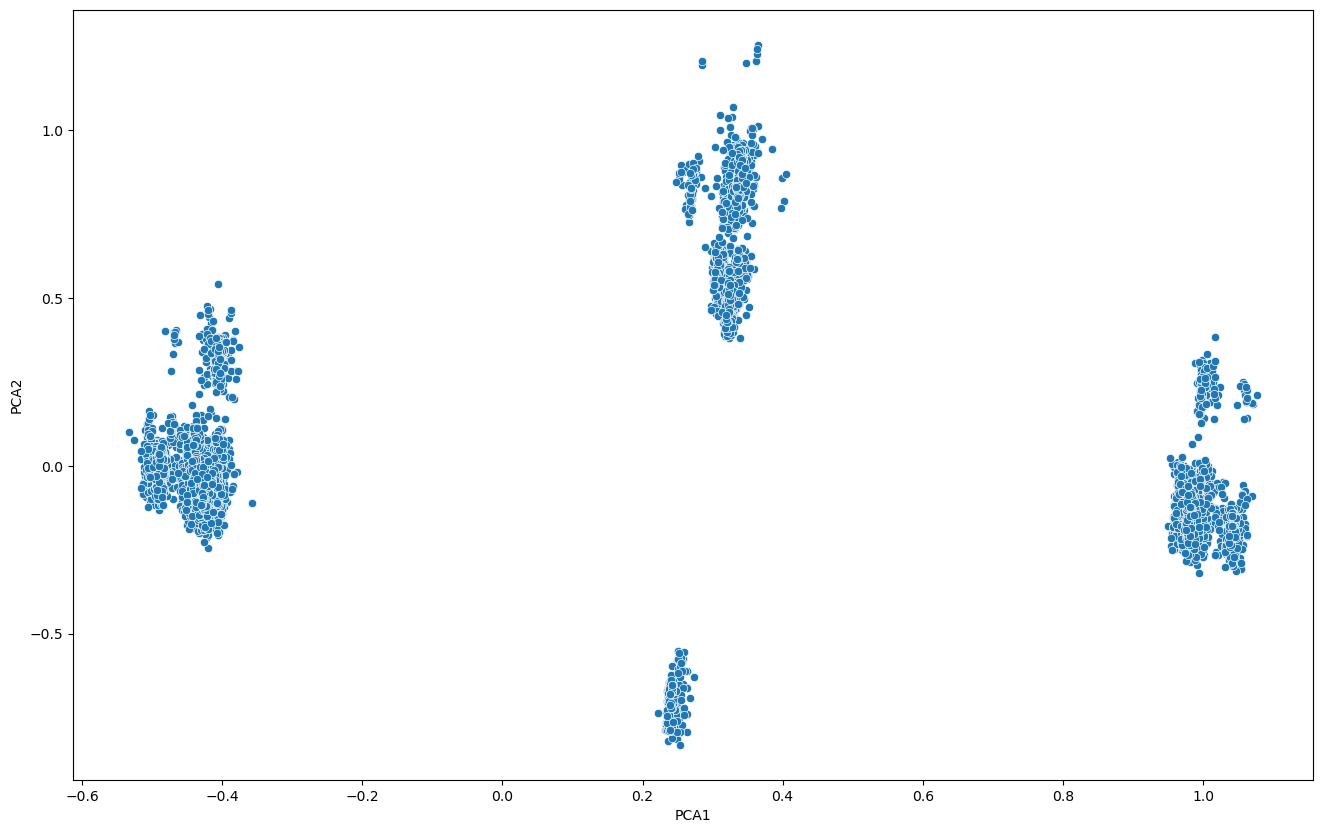

In [26]:
plt.figure(figsize=(16,10))
#sns.scatterplot(

#)
sns.scatterplot(x=df_plot['PCA1'], y=df_plot['PCA2'])

**Q9:** Now we will plot all points from our dataframe ```df_plot``` Using result from T-SNE.

1. Use ```tsne-2d-one``` and ```tsne-2d-one``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.


```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Fall/blob/main/project/Data_Viz_with_PCA_TSNE.ipynb

**A9** Fill the below cells. Use extra cells as per your necessary

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

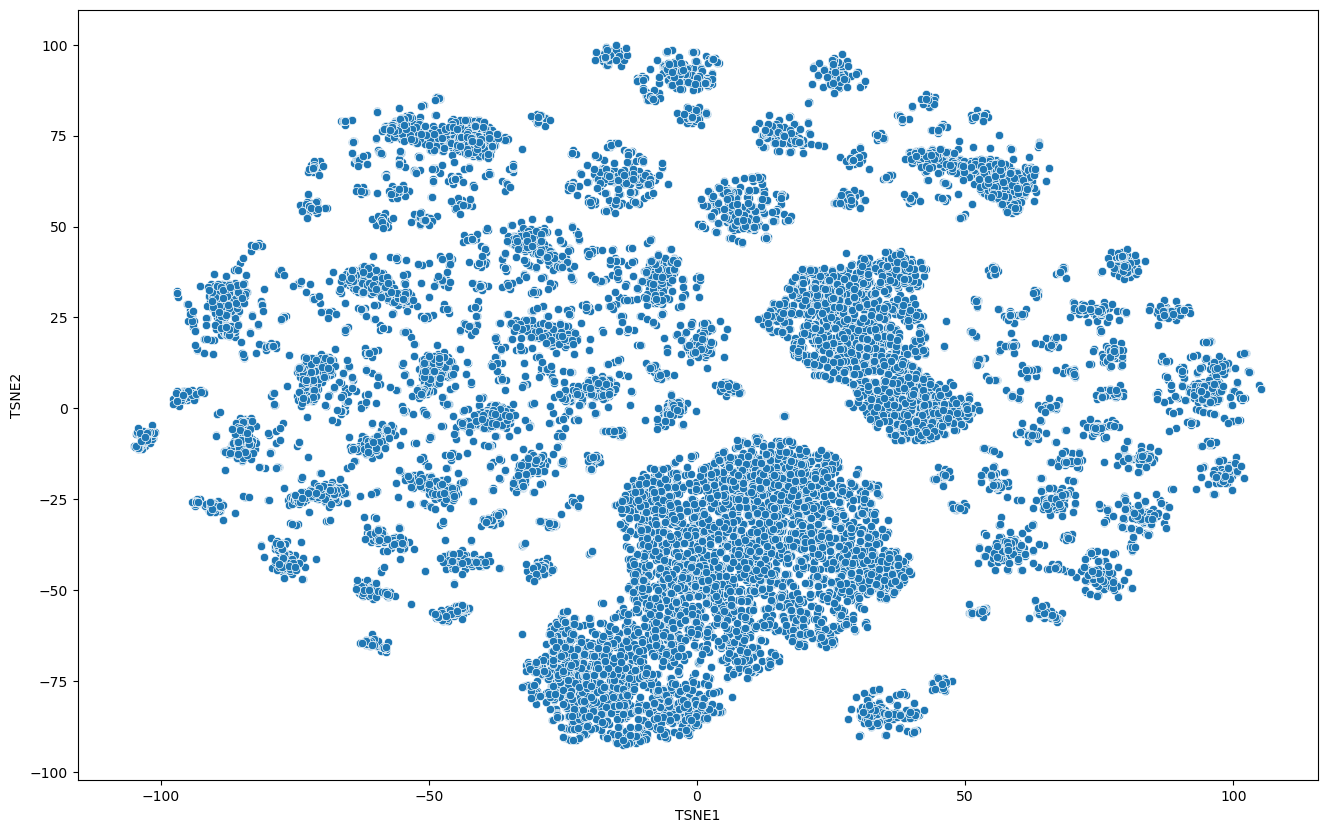

In [27]:
plt.figure(figsize=(16,10))
#sns.scatterplot(
#
#)
sns.scatterplot(x=df_plot['TSNE1'], y=df_plot['TSNE2'])

## Part 2: Data Analysis and Classification Using Entire Dataset

**Q10:** Observe the data plotting and find the realtion between datapoints and their characteristics.


1. Reduce the dimension of our ```Scaled_X``` dataframe to ```3``` using PCA algorithm.
2. Store the result into a variable named ```pca_result```
3. Create Train data and Test data using the pca_result and Y.

```Note:``` 
1. Consider pca_result as X values, and Y as y values.
2. You can use sklearn train_test_split
3. Keep Train and Test ratio as : 75%:25%

**A10** Fill the below cells. Use extra cells as per your necessary

In [28]:
#You can create or remove cells as per your need
pca = PCA(n_components=3)
pca_result = pca.fit_transform(Scaled_X)
print(len(pca_result))
Y.shape

74258


(74258,)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(pca_result, Y, test_size=0.25, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(55693, 3)
(18565, 3)
(55693,)
(18565,)


### Now, Select Three best model for our dataset. You have to decide three models which might work well with our dataset. 

**Q11** 

**Model Number 1** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A11** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```
### Logistic Regression
I am primarily using this as a simple baseline model. 




In [30]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)


c:\Users\Hunter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr_model.score(x_test, y_test)

0.5827632642068409

**Q12** 

**Model Number 2** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A12** Fill the below cells. Use extra cells as per your necessaryReplace ??? with code in the code cell below

```Answer for Q.No:1 goes here```
### SVM
The first model performed poorly, so the data is likely not linearly seperable. SVM with an RBF kernel might perform better.



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='rbf', C=100)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_pred)

In [33]:
print(f'SVC Accuracy: {svc_accuracy}')

SVC Accuracy: 0.6054403447347159


**Q13** 

**Model Number 3** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A13** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```
### Random Forest
Using an ensembling technique with a model that isn't concerned about linearity might improve the score.



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 25, 50, 100, 200, 400],
    'max_leaf_nodes': [None, 10, 25, 50, 100, 200, 400]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best cv score: {grid_search.best_score_:.2f}')

#y_pred_rf = rf.predict(x_test)
#rf_accuracy = accuracy_score(y_test, y_pred_rf)

#print(f'Random Forest Accuracy: {rf_accuracy}')

c:\Users\Hunter\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'max_leaf_nodes': 400}
Best cv score: 0.62


In [35]:
rf = RandomForestClassifier(max_leaf_nodes=400, random_state=42)
rf.fit(x_train, y_train)

y_pref_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pref_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.6177215189873417


**Q14** 


1. Plot a histogram using Y dataframe and display the per-class data distribution(number of rows per class).
2. Also print the number of rows per class as numeric value.

**A14** Fill the below cells. Use extra cells as per your necessary

In [36]:
#You can create or remove cells as per your need

c:\Users\Hunter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cover_Type', ylabel='Count'>

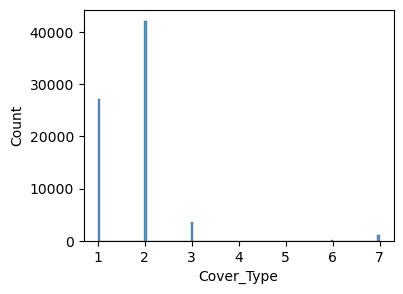

In [37]:
plt.figure(figsize=(4,3))
sns.histplot(data=Y)

**Q15** 


1. From the histogram we can see that the dataset is highly imbalanced.
2. Use a proper dataset balancing technique to make the dataset balanced.
3. Plot a histogram using new y values and display the per-class data distribution(number of rows per class).

```Note:``` Use can use the ```imblearn.over_sampling``` library for this task. But use appropriate strategy for the method.

Follow the documentation for details: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

**A15** Fill the below cells. Use extra cells as per your necessary

In [38]:
#You can create or remove cells as per your need

#?
#X_res, y_res=

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy="not majority") 
X_res, y_res = smote.fit_resample(Scaled_X, Y)

c:\Users\Hunter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cover_Type', ylabel='Count'>

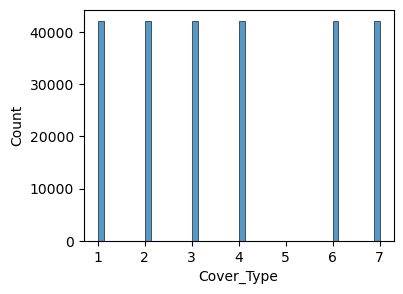

In [39]:
#?
plt.figure(figsize=(4,3))
sns.histplot(data=y_res)

**Q16** 


1. Create new Train and Test data from the balaned X and Y value.
2. Keep Train and Test ratio as : 75%:25%

**A16** Fill the below cells. Use extra cells as per your necessary

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

**Q17**

### Now, Use the previously initialized three models and calculate the score from our new balanced dataset.



**Model Number 1** 

1. Fit the model with the new train data(Use the previous Model 1) 
2. Get the score from the model using  new test data

**A17** Fill the below cells. Use extra cells as per your necessary

In [41]:
#You can create or remove cells as per your need
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

c:\Users\Hunter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
lr_model.score(x_test, y_test)

0.8981887210314008

**Model Number 2** 

1. Fit the model with the new train data(Use the previous Model 2) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [43]:
#You can create or remove cells as per your need
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='rbf', C=100)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {svc_accuracy}')

SVC Accuracy: 0.9775686150438978


**Model Number 3** 

1. Fit the model with the new train data(Use the previous Model 3) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [47]:
rf = RandomForestClassifier(max_depth=2000, max_leaf_nodes=2000, random_state=42)
rf.fit(x_train, y_train)

y_pref_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pref_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9730918294708535


### After making the dataset balanced we can see a significant improve in the performence for all three models.